<a href="https://colab.research.google.com/github/Vyoma-garg/Natural-Language-Processing/blob/main/Q_A_Covid_19_RASA_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RASA Chatbot**

In [ ]:
!pip install -U ipython

Requirement already up-to-date: ipython in /usr/local/lib/python3.7/dist-packages (7.23.1)


In [ ]:
!pip install rasa==1.10.3

     |████████████████████████████████| 512kB 4.0MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 112kB 21.0MB/s 
     |████████████████████████████████| 1.2MB 18.7MB/s 
     |████████████████████████████████| 993kB 31.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 983kB 37.5MB/s 
     |████████████████████████████████| 1.6MB 40.7MB/s 
     |████████████████████████████████| 1.3MB 38.5MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 153kB 39.6MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
     |████████████████████████████████| 184kB 39.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 348kB 37.4MB/s 
     |████████████████████████████████| 40kB 5.9MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     

In [ ]:
!pip install nest_asyncio==1.3.3

ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: nest-asyncio 1.5.1
    Uninstalling nest-asyncio-1.5.1:
      Successfully uninstalled nest-asyncio-1.5.1


In [ ]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()  #to run rasa in asynchronous mode as colab notebooks run in event loop we need this nest_asyncio
print("Event loop ready.")

Event loop ready.


In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
from rasa.cli.scaffold import create_initial_project

In [ ]:
#to create initial project
project = "test-project"
create_initial_project(project)

In [ ]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['actions.py', 'config.yml', 'data', 'tests', 'domain.yml', 'endpoints.yml', '__init__.py', 'credentials.yml', '__pycache__']


In [ ]:
config = "config.yml"
training_files = "data/"  #nlu:intents
domain = "domain.yml" #responses
output = "models/"
print(config, training_files, domain, output)  #output stores model after training 

config.yml data/ domain.yml models/


In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 77.90it/s, # actions=16]
Processed actions: 16it [00:00, 694.18it/s, # examples=16]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:14<00:00,  6.79it/s, t_loss=0.074, loss=0.003, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:16<00:00,  5.92it/s, t_loss=1.471, i_loss=0.086, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20210522-044611.tar.gz'.
models/20210522-044611.tar.gz


In [ ]:
from rasa.jupyter import chat
endpoints = 'endpoints.yml'  
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
good
Great, carry on!
bye
Bye
/stop


Customizing the model

In [ ]:
%%writefile data/nlu.md

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:define
- What is a corona virus?
- What is COVID-19? What is SARS-CoV-2? 

##intent:infected
- Can humans become infected with a novel corona virus of animal source?
- When is a person infectious?
- How severe is COVID-19 infection?  
- Do persons suffering from pollen allergy or allergies in general have a higher risk to develop severe disease when having COVID-19?
- Should people who suffer from pollen allergy self-isolate if they develop typical hay fever symptoms?
- How can I avoid getting infected?
- How can I avoid infecting others?

##intent:info
- Where Can I Get Updated Information on corona virus (COVID-19)?
- Where Can I Get Updated Information on corona virus COVID?

##intent:origin
- Where do corona viruses come from?
- Where do corona viruses come from country ?

##intent:period
- What is the incubation period of the corona virus disease?
- What is the incub period of the corona virus disease?

##intent:protect
- What can I do to protect myself?
- What can I do to protect oneself?

##intent:risk
- Who is most at risk for the corona virus disease?
- Is My Child at Risk for corona virus (COVID-19)?
- Are some people more at risk than others?
- Are children also at risk of infection and what is their potential role in transmission of covid19?
- What is the risk of infection in pregnant women and neonates?
- What is physical distancing and why and how should I do it?
- Are face masks effective in protecting against COVID-19?
- Am I protected against COVID-19 if I had the influenza vaccine this year?
- Are health workers at risk from a novel corona virus?

##intent:sars
- Is the corona virus disease the same as SARS?
- Is this virus comparable to SARS or to the seasonal flu?

##intent:symptoms
- What are the symptoms of someone infected with a corona virus?
- How can we differentiate between hay fever/pollen allergy related respiratory symptoms and COVID-19 infection?

##intent:task
- What Should I Do if a Family Member Has Symptoms of corona virus (COVID-19)?
- How Do Doctors Test People for corona virus (COVID-19)?
- When should I be tested for COVID-19?
- Where can I get tested?

##intent:test
- Where can I get tested?
- When should I be tested for COVID-19?

##intent:transmitted
- Can corona viruse be transmitted from person to person?
- What is the mode of transmission of corona virus?

##intent:vaccine
- Is there a vaccine for a novel corona virus?
- How long will it take to develop a vaccine?

##intent:treatment
- Is there a treatment for a novel corona virus?
- Treatment for a novel corona virus?

##intent:who
- What WHO recommendations for countries?
- What is WHO recommendations for countries?

## intent:corona
- Virus from China
- Corona from china

## intent:goodbye
- bye
- goodbye
- see you around
- see you later


## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?

Overwriting data/nlu.md


In [ ]:
%%writefile domain.yml

intents:
  - greet
  - corona
  - define
  - infected
  - bot_challenge
  - info
  - origin
  - period
  - protect
  - risk
  - sars
  - symptoms
  - task
  - test
  - trasmitted
  - treatment
  - vaccine
  - who
  - workers
  - goodbye
  - deny

responses:


  utter_greet:
  - text: "Hey! How may i help you??"

  utter_corona:
  - text: "I am COVID BOT developed by M20MA004 and M20MA017, Ask me anything regarding the same. Hope I can help you. :) "

  utter_define:
  - text: "corona viruses are a large family of viruses that are known to cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS)."

  utter_infected:
  - text:"Detailed investigations found that SARS-CoV was transmitted from civet cats to humans in China in 2002 and MERS-CoV from dromedary camels to humans in Saudi Arabia in 2012. Several known corona viruses are circulating in animals that have not yet infected humans. As surveillance improves around the world, more corona viruses are likely to be identified."

  utter_info:
  - text: "Check the CDC and World Health Organization (WHO) websites for up-to-date, reliable information about corona virus."

  utter_origin:
  - text: "corona viruses are viruses that circulate among animals with some of them also known to infect humans. Bats are considered natural hosts of these viruses yet several other species of animals are also known to act as sources. For instance, Middle East Respiratory Syndrome corona virus (MERS-CoV) is transmitted to humans from camels, and Severe Acute Respiratory Syndrome corona virus-1 (SARS-CoV-1) is transmitted to humans from civet cats. More information on corona viruses can be found in the ECDC factsheet."

  utter_period:
  - text: "The “incubation period” means the time between catching the virus and beginning to have symptoms of the disease. Most estimates of the incubation period for COVID-19 range from 1-14 days, most commonly around five days. These estimates will be updated as more data become available."

  utter_protect:
  - text: "Standard recommendations to reduce exposure to and transmission of a range of illnesses include maintaining basic hand and respiratory hygiene, and safe food practices  and avoiding close contact, when possible, with anyone showing symptoms of respiratory illness such as coughing and sneezing."

  utter_risk:
  - text: "People of all ages can be infected by the new corona virus (2019-nCoV). Older people, and people with pre-existing medical conditions (such as asthma, diabetes, heart disease) appear to be more vulnerable to becoming severely ill with the virus.WHO advises people of all ages to take steps to protect themselves from the virus, for example by following good hand hygiene and good respiratory hygiene."

  utter_symptoms:
  - text: "It depends on the virus, but common signs include respiratory symptoms, fever, cough, shortness of breath, and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death."

  utter_task:
  - text: "The symptoms of corona virus (fever, cough, and trouble breathing) can look a lot like illnesses from other viruses. If a family member has trouble breathing, go to the emergency room or call an ambulance right away. Call your doctor if someone in your family has a fever, cough, or other flu-like symptoms. If this person has been near someone with corona virus or lived in or traveled to an area where lots of people have corona virus, tell the doctor. The doctor can decide whether your family member: can be treated at home should come in for a visit can have a telehealth visit needs to be tested for corona virus"

  utter_test:
  - text : "To test someone for corona virus, doctors send a mucus sample from the nose and back of the throat to a lab. If the person coughs up mucus, doctors might send that for testing too."

  utter_transmitted:
  - text : "Yes, some corona viruses can be transmitted from person to person, usually after close contact with an infected patient, for example, in a household workplace, or health care centre."

  utter_treatment:
  - text : "There is no specific treatment for disease caused by a novel corona virus. However, many of the symptoms can be treated and therefore treatment based on the patient’s clinical condition. Moreover, supportive care for infected persons can be highly effective."

  utter_vaccine:
  - text: "The development of vaccines take time. Several pharmaceutical companies and research laboratories are working on vaccine candidates. It will, however, take months or years before any vaccine can be widely used, as it needs to undergo extensive testing in clinical trials to determine its safety and efficacy.  These clinical trials are an essential precursor to regulatory approval and usually take place in three phases. The first, involving a few dozen healthy volunteers, tests the vaccine for safety, monitoring for adverse effects. The second, involving several hundred people, usually in a part of the world badly affected by the disease, looks at how effective the vaccine is in the field, and the third does the same in several thousand people."

  utter_who:
  - text: "Yes, they can be, as health care workers come into contact with patients more often than the general public WHO recommends that health care workers consistently apply appropriate"

  utter_workers:
  - text: "In the last month, the number of cases and deaths reported in the EU/EEA has increased exponentially from less than 2 000 cases to more than 350 000 (as of 30 March). During this time, all EU/EEA countries have reported increasing numbers of new cases; Italy has reported more than 90 000 new cases and Spain more than 75 000 new cases. If this trend continues, based on the quick pace of growth of the epidemic observed in China and northern Italy, it is likely that in days, or a small number of weeks, nationally incapacitating epidemics will be observed in most EU/EEA Member States."
  
  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

  utter_goodbye:
  - text: "Bye - Bye"

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true

Overwriting domain.yml


In [ ]:
%%writefile data/stories.md


## greet
* greet
  - utter_greet

* corona
  - utter_corona

* define
  - utter_define

* infected
  -utter_infected
  
* info
  -utter_info

* origin
  -utter_origin

* risk
  -utter_risk

* symptoms
  -utter_symptoms

* task
  -utter_task

* test
  -utter_test

* trasmitted
  -utter_transmitted

* treatment
  -utter_treatment

* vaccine
  -utter_vaccine

* deny
  - utter_goodbye


## sad path 2
* greet
  - utter_greet

* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help

* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot

Overwriting data/stories.md


In [ ]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_infected' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'mood_unhappy' on line 51. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
Processed trackers:   0%|          | 0/4 [00:00<?, ?it/s, # actions=7]

Training Core model...


Processed trackers: 100%|██████████| 4/4 [00:00<00:00, 37.44it/s, # actions=38]
Processed actions: 38it [00:00, 574.75it/s, # examples=38]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:18<00:00,  5.30it/s, t_loss=0.198, loss=0.090, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:56<00:00,  1.77it/s, t_loss=2.823, i_loss=1.127, i_acc=0.970]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20210522-044857.tar.gz'.
models/20210522-044857.tar.gz


In [ ]:
endpoints = "endpoints.yml"

In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How may i help you??
corona
Check the CDC and World Health Organization (WHO) websites for up-to-date, reliable information about corona virus.
Virus from China
I am COVID BOT developed by M20MA004 and M20MA017, Ask me anything regarding the same. Hope I can help you. :)
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How may i help you??
What should one do if one gets infected with corona
text:"Detailed investigations found that SARS-CoV was transmitted from civet cats to humans in China in 2002 and MERS-CoV from dromedary camels to humans in Saudi Arabia in 2012. Several known corona viruses are circulating in animals that have not yet infected humans. As surveillance improves around the world, more corona viruses are likely to be identified."
how should one protect from covid
corona viruses are a large family of viruses that are known to cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS).
protect
corona viruses are a large family of viruses that are known to cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS)

In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How may i help you??
corona
I am COVID BOT developed by M20MA004 and M20MA017, Ask me anything regarding the same. Hope I can help you. :)
define
The development of vaccines take time. Several pharmaceutical companies and research laboratories are working on vaccine candidates. It will, however, take months or years before any vaccine can be widely used, as it needs to undergo extensive testing in clinical trials to determine its safety and efficacy.  These clinical trials are an essential precursor to regulatory approval and usually take place in three phases. The first, involving a few dozen healthy volunteers, tests the vaccine for safety, monitoring for adverse effects. The second, involving several hundred people, usually in a part of the world badly affected by the disease, looks at how effective the vaccine is in the field, and the third does the same in several thousand people.
Can humans become infecte

/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: Interpreter parsed an intent 'transmitted' which is not defined in the domain. Please make sure all intents are listed in the domain.
  More info at https://rasa.com/docs/rasa/core/domains/


Did that help you?
yes
Bye - Bye
/stop


In [ ]:
chat(model_path, endpoints)

In [ ]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

/tmp/tmpyy3lgw9x /tmp/tmpgqosftbm


/usr/local/lib/python3.7/dist-packages/rasa/core/training/dsl.py:431: UserWarning: Found unknown intent 'mood_unhappy' on line 51. Please, make sure that all intents are listed in your domain yaml.
  docs=DOCS_URL_DOMAINS,
100%|██████████| 66/66 [00:00<00:00, 113.62it/s]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Done testing...


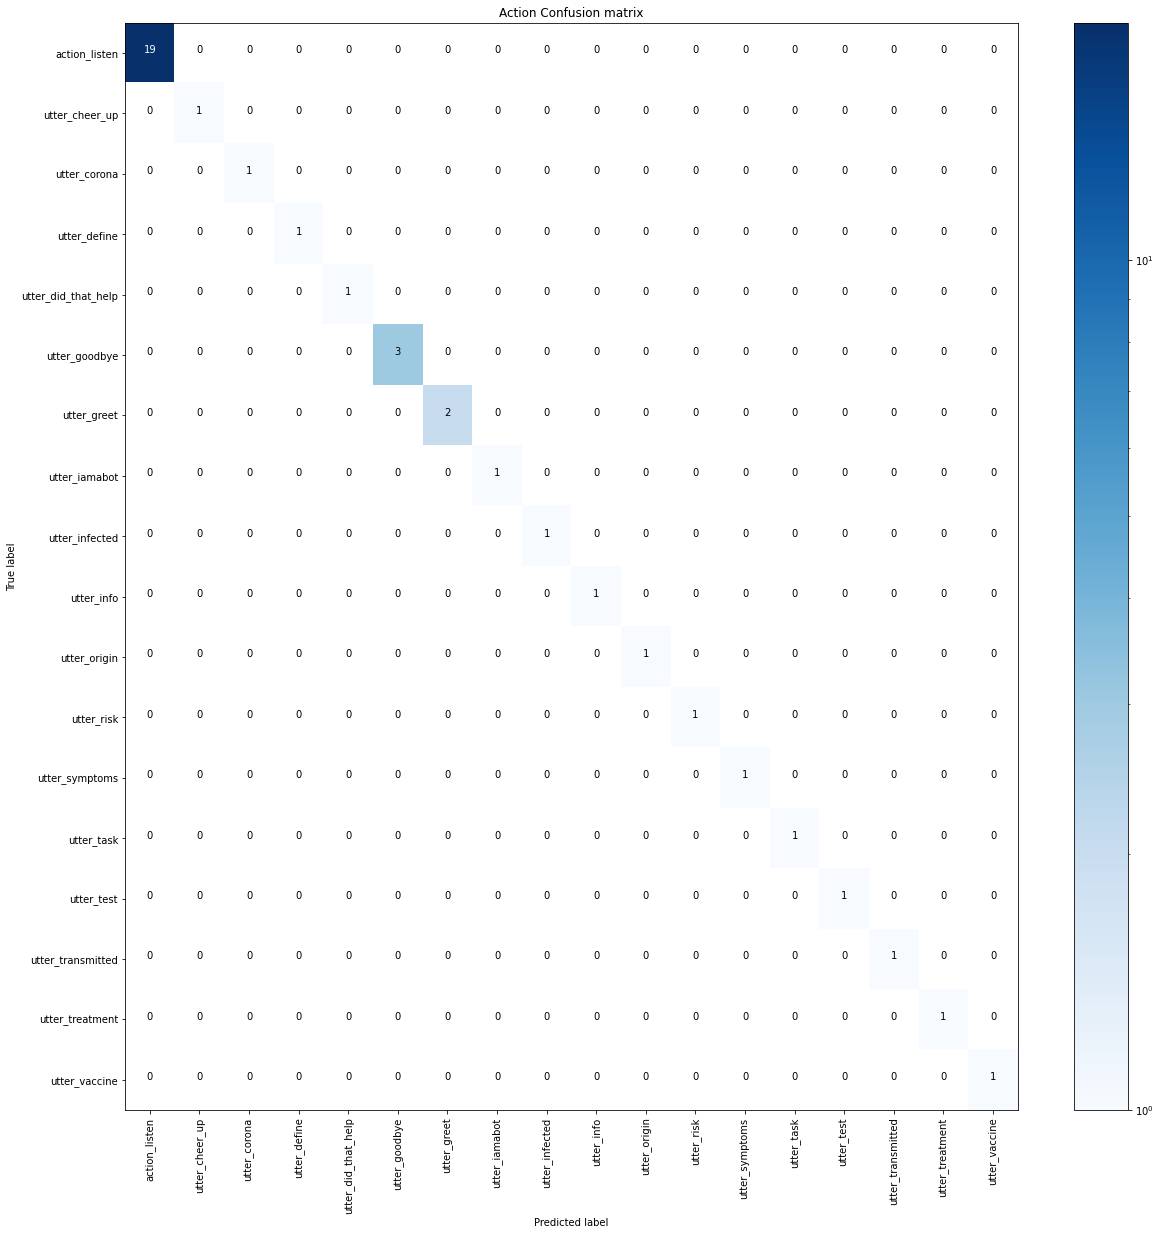

In [ ]:
rasa.test(model_path, stories_directory, nlu_data_directory)
print("Done testing...")